In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import sklearn as sk
from scipy.stats.mstats import gmean

In [2]:
programming=pd.read_csv('C:\course work\career\TTI\Programming_Part1_TTI_Challenge.csv')
programming.head()

,Class PartNo X Y
0,AAA\tX135\t0.21\t1.124
1,AAA\tX126\t0.21\t1.179
2,EBHA\tX195\t0.32\t1.191
3,EBHA\tX194\t0.82\t1.249
4,AAA\tX139\t0.81\t1.255


In [4]:
programming[programming.columns[0].split('\t')]=pd.DataFrame(programming[str(programming.columns[0])].apply(lambda x: x.split('\t')).apply(pd.Series))
programming=programming.drop(programming.columns[0],axis=1)
programming.X=pd.to_numeric(programming.X)
programming.Y=pd.to_numeric(programming.Y)
programming.head()

,Class,PartNo,X,Y
0,AAA,X135,0.21,1.124
1,AAA,X126,0.21,1.179
2,EBHA,X195,0.32,1.191
3,EBHA,X194,0.82,1.249
4,AAA,X139,0.81,1.255


In [17]:
stats={'Stats':['Min','Mean','Max','GMean','STD'],
    'X':[programming.X.min(),programming.X.mean(),programming.X.max(),gmean(programming.X),programming.X.std()],
    'Y':[programming.Y.min(),programming.Y.mean(),programming.Y.max(),gmean(programming.Y),programming.Y.std()]}
stats=pd.DataFrame(stats)
print(stats)

   Stats          X         Y
0    Min   0.210000  1.124000
1   Mean   5.499100  3.525130
2    Max  10.020000  7.498000
3  GMean   4.495324  3.108310
4    STD   2.672921  1.734591


In [45]:
import pyodbc 
from sqlalchemy import create_engine
server='VIVEKA\TTI'
DB='pandas'
connectionString = 'mssql+pyodbc://'+server+'/'+DB+'?driver=SQL Server'
engine=create_engine(connectionString)
programming.to_sql('programming',engine,if_exists='replace')

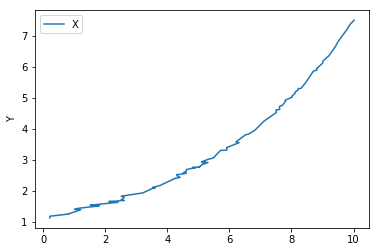

In [24]:
plt.plot(programming.X,programming.Y,label='X')
plt.ylabel('Y')
plt.legend()
plt.show()

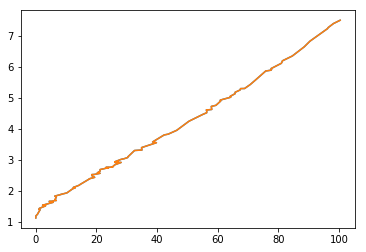

In [28]:
programming['X2']=programming.X**2
plt.plot(programming.X2,programming.Y,label='X^2')
plt.show()

In [49]:
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
model=smf.ols(formula='Y ~ X+X2', data=programming).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.218e+04
Date:                Thu, 01 Mar 2018   Prob (F-statistic):          8.59e-130
Time:                        16:22:03   Log-Likelihood:                 109.91
No. Observations:                 100   AIC:                            -213.8
Df Residuals:                      97   BIC:                            -206.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3273      0.031     43.138      0.0

In [83]:
from sklearn.model_selection import train_test_split
var_score=[]
for i in range(10):
    Train,Test = train_test_split(programming, test_size=0.2)
    model = smf.ols(formula='Y ~ X+X2', data=Train).fit()
    predictions=model.predict(Test)
    # Explained variance score: 1 is perfect prediction
    var_score.append(r2_score(Test.Y, predictions))

    
print('Mean Variance score:', sum(var_score)/10)

Mean Variance score: 0.997487446362


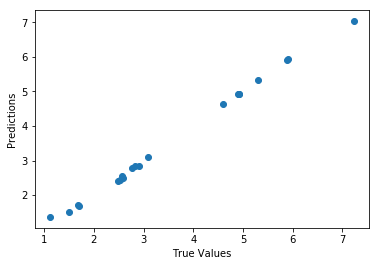

In [89]:
plt.scatter(Test.Y,predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()